In [34]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
from tensorflow import keras

for module in (tf, mpl, np, pd, keras):
    print(module.__name__, module.__version__)

tensorflow 2.0.0-alpha0
matplotlib 3.1.0
numpy 1.16.4
pandas 0.24.2
tensorflow.python.keras.api._v2.keras 2.2.4-tf


## Load play datasets

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

import pprint
pprint.pprint(housing.data[0])
pprint.pprint(housing.target[0])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Split input data in train and test

In [10]:
from sklearn.model_selection import train_test_split

# by default train_test_split split data in 3: 1 -> train and test -> default param -> test_size = 0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


## Normalize inputdata by using Sklearn Standscalar

- Z-score: x = ( x - u ) / std      (what we used for this case)
- Min-max: x = ( x - min ) / ( max - min )

In [13]:
from sklearn.preprocessing import StandardScaler

# before normalization
print(np.max(x_train), np.min(x_train))

# perform normalization
scaler = StandardScaler()
# 1. data in x_train is int32, we need to convert them to float32 first 
# 2. convert x_train data from 
#    [None, 28, 28] -> [None, 784] 
#       -> after all reshape back to [None, 28, 28]
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled  = scaler.transform(x_test)

# after normalization
print(np.max(x_train_scaled), np.min(x_train_scaled))

28566.0 -124.3
81.80221745207753 -2.3594398206242224


## Build model by using tf.keras high level API

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation = 'relu', input_shape=x_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.summary()
# mean_squared_error make model as regression
model.compile(loss = "mean_squared_error", optimizer = "sgd", metrics = ["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3)
]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Train model with callback

In [39]:
history = model.fit(x_train_scaled, y_train, 
                    validation_data=(x_valid_scaled, y_valid),
                    epochs = 100, 
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 53us/sample - loss: 2.4139 - accuracy: 0.0028 - val_loss: 1.2115 - val_accuracy: 0.0023
Epoch 2/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.9090 - accuracy: 0.0031 - val_loss: 0.8205 - val_accuracy: 0.0023
Epoch 3/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.7091 - accuracy: 0.0031 - val_loss: 0.7197 - val_accuracy: 0.0023
Epoch 4/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6434 - accuracy: 0.0031 - val_loss: 0.6734 - val_accuracy: 0.0023
Epoch 5/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.6065 - accuracy: 0.0031 - val_loss: 0.6428 - val_accuracy: 0.0023
Epoch 6/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5816 - accuracy: 0.0031 - val_loss: 0.6238 - val_accuracy: 0.0023
Epoch 7/100
11610/11610 [==========================

Epoch 55/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4107 - accuracy: 0.0031 - val_loss: 0.4359 - val_accuracy: 0.0023
Epoch 56/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4096 - accuracy: 0.0031 - val_loss: 0.4336 - val_accuracy: 0.0023
Epoch 57/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4087 - accuracy: 0.0031 - val_loss: 0.4327 - val_accuracy: 0.0023
Epoch 58/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4079 - accuracy: 0.0031 - val_loss: 0.4313 - val_accuracy: 0.0023
Epoch 59/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4066 - accuracy: 0.0031 - val_loss: 0.4301 - val_accuracy: 0.0023
Epoch 60/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4056 - accuracy: 0.0031 - val_loss: 0.4290 - val_accuracy: 0.0023
Epoch 61/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4046 - ac

## Result visualization

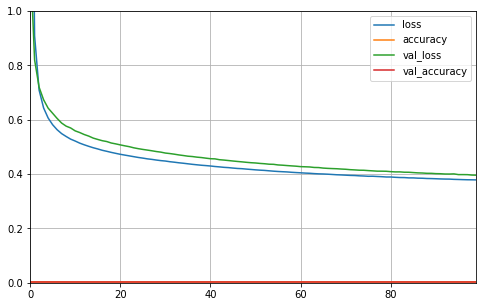

In [40]:
from tensorflow.python.keras.callbacks import History

def plot_learning_curves(history: History):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

## Evaluate model with test dataset

In [41]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 24us/sample - loss: 0.3972 - accuracy: 0.0033


## Made a simple prediction on test dataset

In [42]:
# one_hot encoded results
predictions = model.predict(x_test)

print(x_test[0])
print(y_test[0])
print(predictions[0])

[ 2.02780000e+00  3.10000000e+01  2.84692850e+00  1.09164149e+00
  3.10700000e+03  3.12890232e+00  3.40600000e+01 -1.18310000e+02]
3.6
[270.1904]
